交通流量预测     
JetRail高铁的乘客数量预测    
数据集：jetrail.csv    
根据过往3年的数据（2012 年 1 月至 2014 年 12月），需要用这些数据预测接下来 7 个月的乘客数量    
以每天为单位聚合数据集

In [101]:
from datetime import datetime
import pandas as pd
from fbprophet import Prophet
from statsmodels.api import tsa
from matplotlib import pyplot as plt
from fbprophet.plot import plot_forecast_component # 绘制单成分
from fbprophet.plot import add_changepoints_to_plot # 显示突变点

In [102]:
df = pd.read_csv('train.csv')
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [103]:
#转化日期格式
df['Datetime'] = pd.to_datetime(df['Datetime'],format='%d-%m-%Y %H:%M')
df

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [104]:
#将Datetime设定为索引
df = df.set_index('Datetime')

In [105]:
#去掉ID
df.drop(['ID'],axis=1,inplace=True)
df.tail(2)

,Count
Datetime,
2014-09-25 22:00:00,580
2014-09-25 23:00:00,534


In [106]:
#按天重采样——日乘客数
df_day = df.resample("D").sum()

In [107]:
print(df_day.shape)
df_day

(762, 1)


,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [109]:
# 重命名列名
df_day['ds'] = df_day.index
df_day['y'] = df_day['Count']

In [113]:
df_day.drop(['Count'],axis=1,inplace=True)

In [114]:
df_day

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


In [116]:
#拟合Prophet模型
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(df_day)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


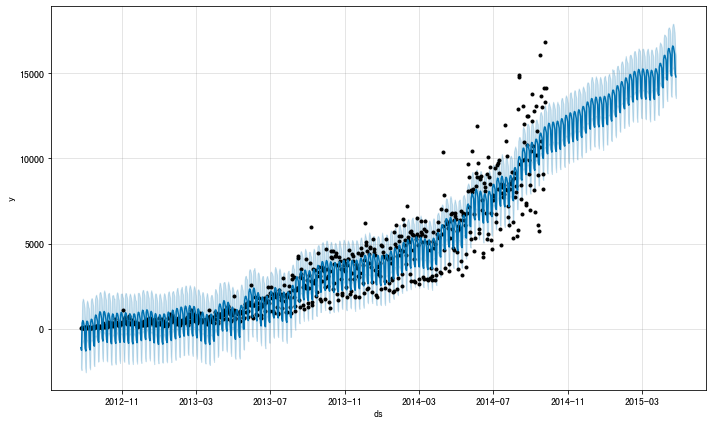

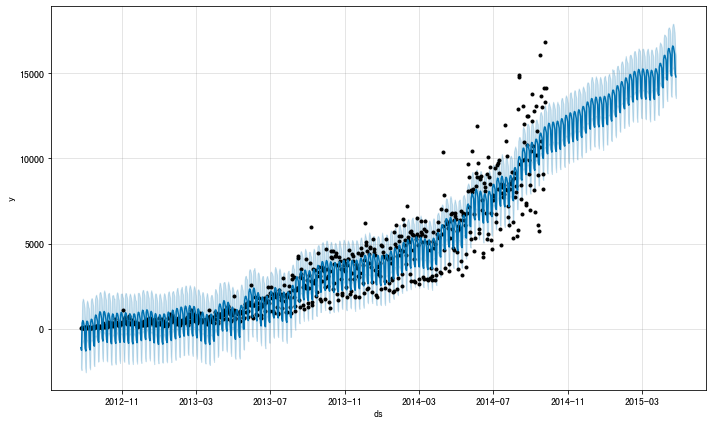

In [117]:
m.plot(forecast)

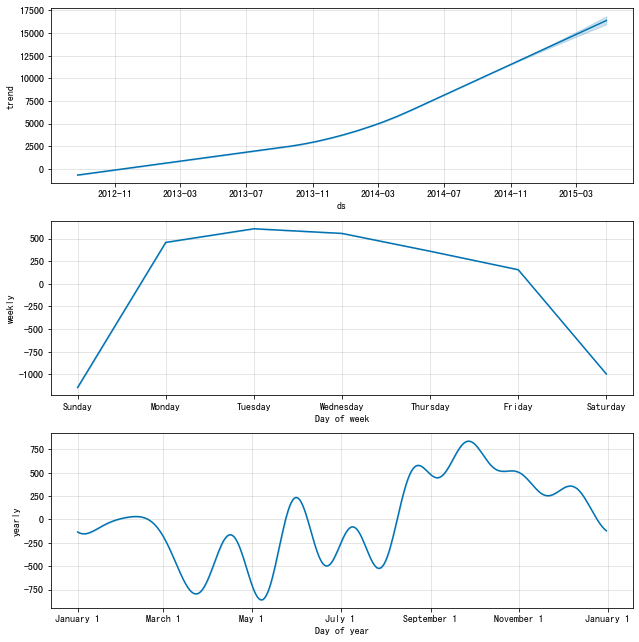

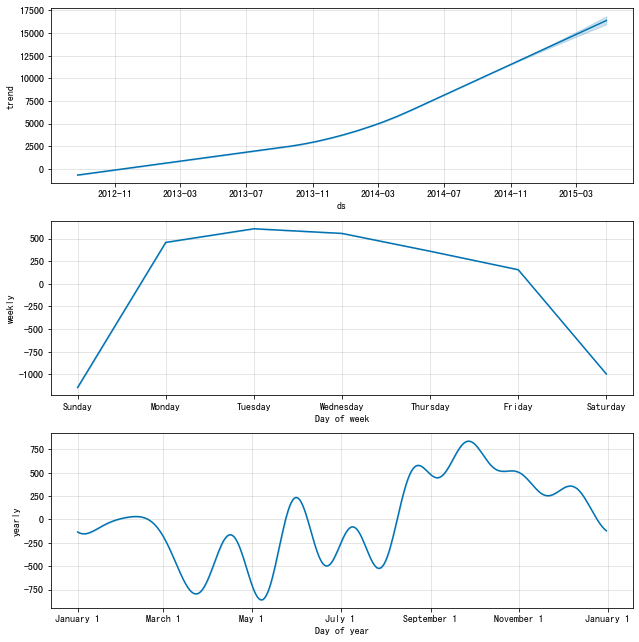

In [118]:
#查看各个components
m.plot_components(forecast)